In [1]:
# required imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from pprint import pprint

#some columns contain comma-separated lists in string format, I turn them into list-objects here.
def c2l(commastring): 
    return commastring.split(', ')

df = pd.read_csv('anonymized_MythFic_metadata.csv', sep=';', converters={'character': c2l, 'category': c2l, 'fandom': c2l, 'relationship': c2l, 'additional tags': c2l,})

In [2]:
# indexing and alignment
df.index

RangeIndex(start=0, stop=5154, step=1)

In [1]:
# to check whether the metadata was imported correctly, uncomment the following line of code:
# df.head

## Relationship Categories

Fics are categorized according to the presence and gender of relationships.  

The 7 types of relationships on AO3 are F/M (female/male), M/M (male/male), F/F (female/female), Gen (general, meaning no romantic or sexual relationships, Multi (meaning multiple types of relationships are present), and Other. The code below counts the frequency of each relationship category and visualizes them in a bar plot. It also includes the 'None' category for stories not tagged with any type of relationship.   


{'F/M': 2045, 'Gen': 1367, 'M/M': 1301, 'F/F': 481, 'None': 413, 'Other': 278, 'Multi': 250}


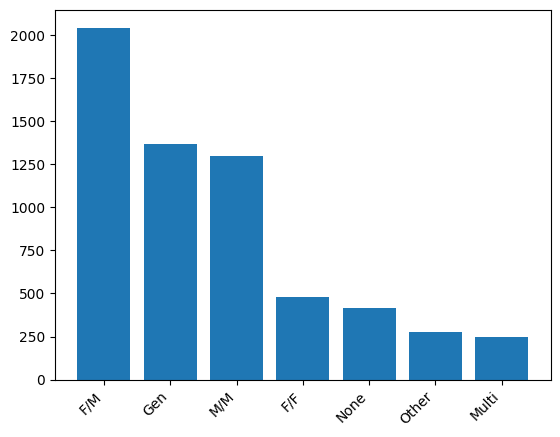

In [4]:
# fics are categorized according to the presence and gender of relationships.

def plot_df_by_gender(df):
    # identify all values used in the category-column
    category_list = df['category'].sum()

    # sanity check
    #print(category_list)

    # count frequency per value
    category_counter = Counter(category_list)
    

    #add 'None' label
    try:
        category_counter['None'] = category_counter.pop('')
    except KeyError:
        pass
    
    # sort by highest-frequency
    category_count_sorted = dict(category_counter.most_common())

    print(category_count_sorted)

    # plot results
    plt.bar(category_count_sorted.keys(), category_count_sorted.values())
    # plt.title('Frequency of Categories')
    plt.xticks(rotation=45, ha="right")

    # save as png
    # plt.savefig("category_sorted_AGrl.png")

plot_df_by_gender(df)

## Violence-Related Additional Tags

On AO3, authors can also tag their stories with additional tags. These can contain any type of information the author wants to communicate about their story, including but not limited to themes, topics, trigger warnings or musings on the story or writing process.  

In the following code, I cound the number of unique additional tags present in *MythFic Metadata*. Then, I identify the 500 most frequently-used additional tags. I then assessed these tags to see whether they indicate violence in the story, and used violence-related tags to define five categories of violence in fanfiction.

In [5]:
# identify all values used in the additional tags-column
additional_tag_list = df['additional tags'].sum()

# how many unique tags?
print(len(set(additional_tag_list)))

13936


In [13]:
# I created the violence-tagsets manually by looking at these tags and deciding which ones relate to violence.

# count frequency per value
additional_tag_counter = Counter(additional_tag_list)

# You can also see in these results that 616 stories have no additional tags, which is why I looked at 501 tags.
# In order to see the resulting tags, uncomment the following line of code:
#print(additional_tag_counter.most_common (501))

In [7]:
# here, I manually define the sets of tags that make up the violence categories.

violence_tags = ['Canon-Typical Violence','Violence','Blood','Blood and Violence',
                 'Non-Graphic Violence','Minor Violence','Torture','Cannibalism', 
                 'Pain','Implied/Referenced Torture','Past Abuse']

noncon_tags = ['Implied/Referenced Rape/Non-con','Incest','Dubious Consent', 'Rape/Non-con Elements',
               'Sibling Incest','Past Rape/Non-con','Rape', 'Bestiality', 'Gang Rape', 'Mildly Dubious Consent',
               'Implied/Referenced Incest']

rough_tags = ['Rough Sex','Biting','Hair-pulling','Spanking',]

captivity_tags = ['Kidnapping', 'Abduction','Captivity', 'Imprisonment']

death_tags = ['Death','Implied/Referenced Character Death','Minor Character Death', 'Murder',
              'Temporary Character Death', 'Past Character Death']


## In order to perform analysis in SPSS, I need to transform this data

In [8]:
df_benelux = df['category'] + df['additional tags']
print(df_benelux)

0       [M/M, References to Ancient Greek Religion & L...
1       [F/M, Enemies to Lovers, Slave Trade, Alternat...
2                    [F/F, F/M, Gen, M/M, Multi, Other, ]
3       [F/F, F/M, M/M, abilities, abusing, Drug Use, ...
4       [M/M, Post-Canon, Afterlife, Established Relat...
                              ...                        
5149    [M/M, Greek Mythology - Freeform, Supernatural...
5150    [M/M, Greek Mythology - Freeform, Angst, Super...
5151    [M/M, Drama, Supernatural Elements, Greek Myth...
5152    [M/M, Greek Mythology - Freeform, Supernatural...
5153    [Gen, Mythical Beings & Creatures, Poetry, Str...
Length: 5154, dtype: object


In [9]:
def rowTagPresence(row, tagSets):
    rowdict = {}
    for name, tagSet in tagSets.items():
        if set(tagSet) & set(row):
            rowdict[name] = 1
        else:
            rowdict[name] = 0
    return rowdict

tally = []
            
for row in df_benelux:
    tally.append(rowTagPresence(row, {
        'F/M': ['F/M'],
        'M/M': ['M/M'],
        'F/F': ['F/F'],
        'Gen': ['Gen'],
        'Multi': ['Multi'],
        'Other': ['Other'],
        'physical': ['Canon-Typical Violence','Violence','Blood','Blood and Violence',
                 'Non-Graphic Violence','Minor Violence','Torture','Cannibalism', 
                 'Pain','Implied/Referenced Torture','Past Abuse'],
        'sexual': ['Implied/Referenced Rape/Non-con','Incest','Dubious Consent', 'Rape/Non-con Elements',
               'Sibling Incest','Past Rape/Non-con','Rape', 'Bestiality', 'Gang Rape', 'Mildly Dubious Consent',
               'Implied/Referenced Incest'],
        'rough': ['Rough Sex','Biting','Hair-pulling','Spanking',],
        'captivity': ['Kidnapping', 'Abduction','Captivity', 'Imprisonment'],
        'death': ['Death','Implied/Referenced Character Death','Minor Character Death', 'Murder',
              'Temporary Character Death', 'Past Character Death']
    }))

#pprint(tally)

In [10]:
# now write this transformed data to a csv
keys = tally[0].keys()

with open('tally.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(tally)

In [12]:
# check
df = pd.DataFrame([tally])

#to check whether the tally worked, uncomment the following line.
#print(df)